The task is to use Latent Dirichlet Allocation for topic modelling.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import textwrap

from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/valentine/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# extending the stopwords list
stopwords = set(stopwords.words('english'))

In [4]:
stopwords = stopwords.union({'said', 'would', 'could', 'told', 'also', 'one', 'two', 'mr', 'mrs', 'new', 'year'})

In [5]:
# download BBC text classification dataset
# original dataset on Kaggle: https://www.kaggle.com/datasets/shivamkushwaha/bbc-full-text-document-classification)
!wget -nc https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv

File ‘bbc_text_cls.csv’ already there; not retrieving.



In [6]:
# save the dataset in Pandas dataframe
df = pd.read_csv('bbc_text_cls.csv')

In [7]:
# use count vectorizer 
vectorizer = CountVectorizer(stop_words=stopwords)

In [8]:
X = vectorizer.fit_transform(df['text'])

In [9]:
# use a model with LDA 
lda = LatentDirichletAllocation(n_components=10)

In [10]:
lda.fit(X)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=10, n_jobs=None,
                          perp_tol=0.1, random_state=None,
                          topic_word_prior=None, total_samples=1000000.0,
                          verbose=0)

In [11]:
# show top 10 words from 10 topics
def plot_top_words(model, feature_names, n_top_words=10):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]
        
        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx + 1}", fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle('LDA', fontsize=40)
    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

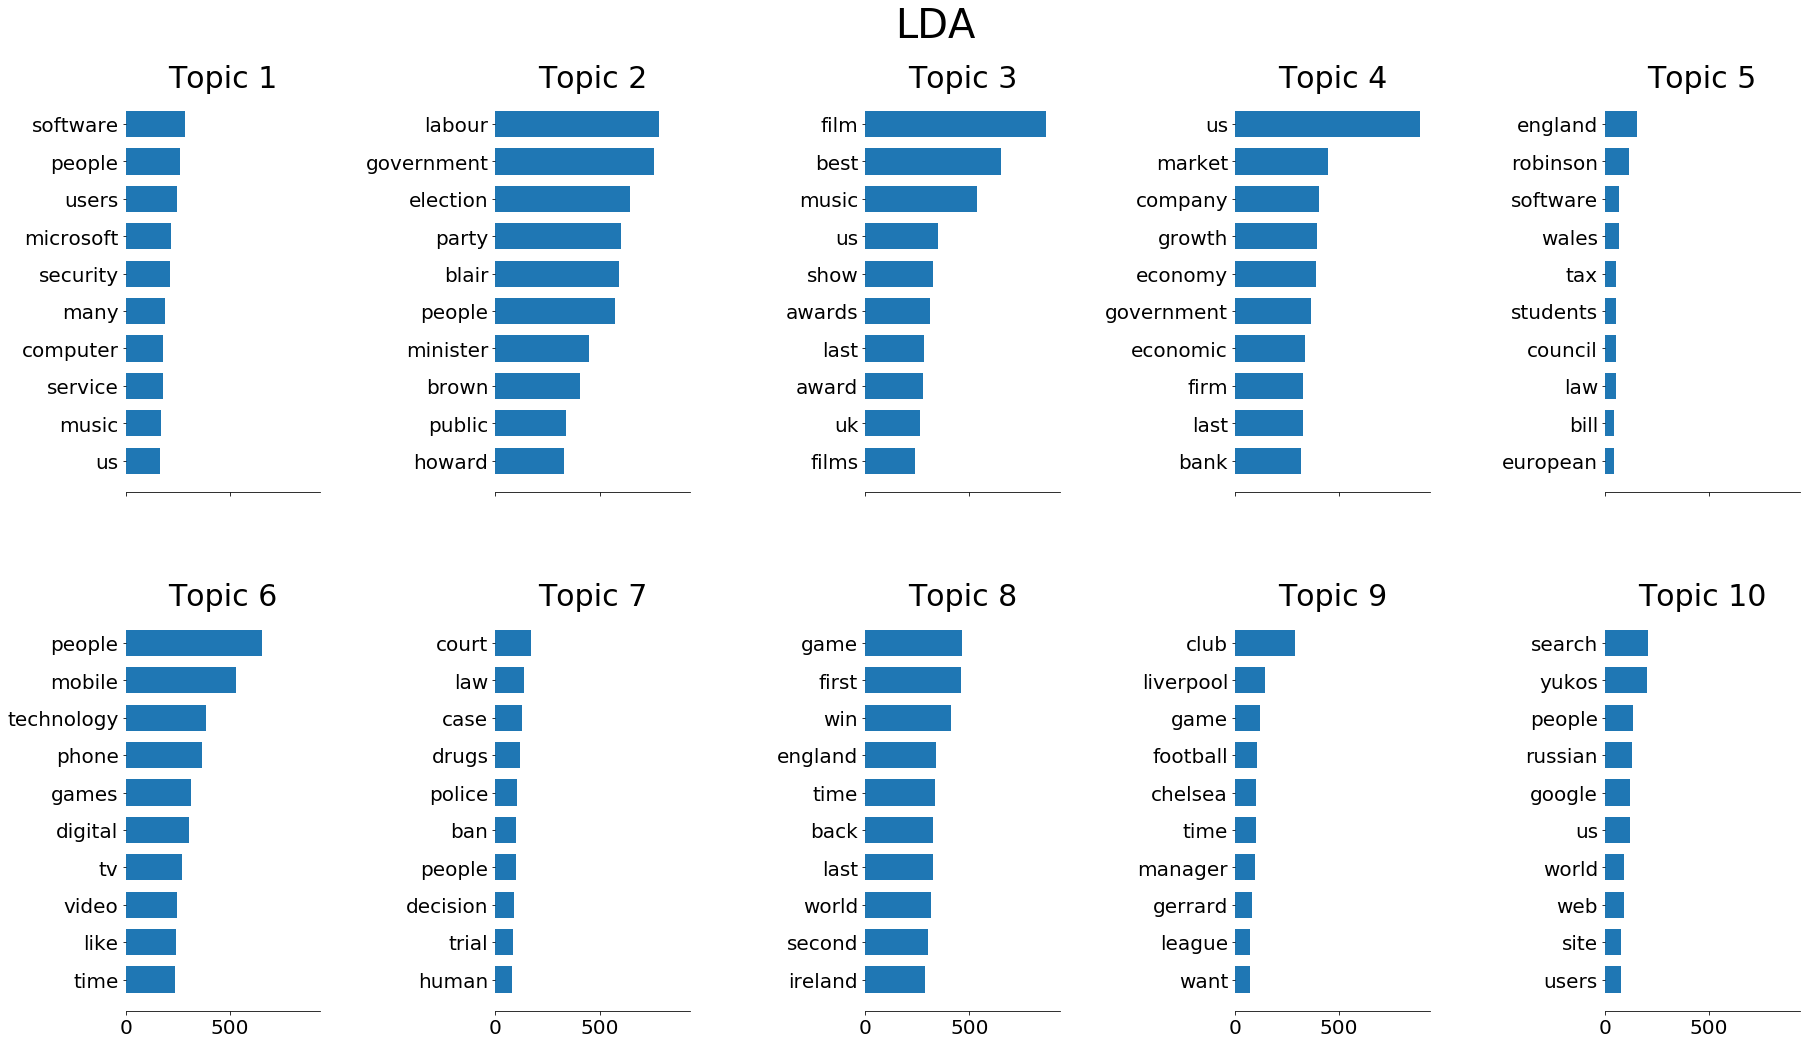

In [12]:
feature_names = vectorizer.get_feature_names()
plot_top_words(lda, feature_names)

In [13]:
Z = lda.transform(X)

Text(0.5, 1.0, 'True label: entertainment')

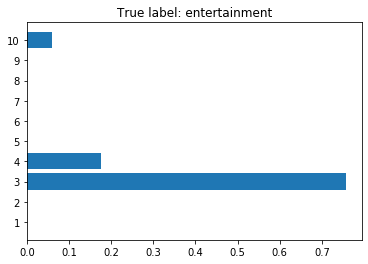

In [14]:
# pick a random document, check which topics are associated with it and if they're related to the true label
i = np.random.choice(len(df))
z = Z[i]
topics = np.arange(10) + 1

fix, ax = plt.subplots()
ax.barh(topics, z)
ax.set_yticks(topics)
ax.set_title('True label: %s' % df.iloc[i]['labels'])

In [15]:
# the random text belongs to entertainment section and is connected to the topic 3 which makes sense
print(textwrap.fill(df.iloc[i]['text'], replace_whitespace=False, fix_sentence_endings=True))

U2 to play at Grammy awards show

Irish rock band U2 are to play live
at the Grammy Awards presentation in the US next month, organisers
have said.

Other acts to play include soul singer Alicia Keys,
country singer Tim McGraw and punk band Green Day at the event on 13
February in Los Angeles.  U2 are nominated twice for their recent
single Vertigo, including a nomination for best rock song.  This year
the Grammys have been dominated by rap star Kanye West, who is in
contention for 10 awards.  US comedian Ellen Degeneres and singer
Christine Milian will present awards at the event.  Last week Grammy
producers announced the show will be hosted by rap star and Chicago
actress Queen Latifah.  It will be held at the Staples Center.  U2 had
number one success in the album charts on both sides of the Atlantic
in November when their latest studio album, How to Dismantle an Atomic
Bomb, topped the US and UK charts.  The band, who are also dominated
for best international album at this year's B